In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["2mu2e","2mu2e_oneelectron","2mu2e_twoelectron","2mu2e_onephoton","2mu2e_twophoton"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


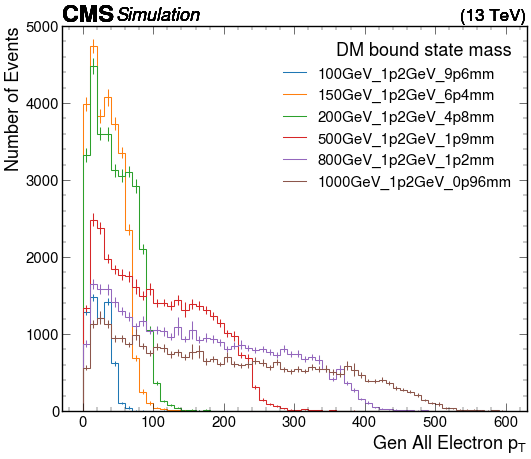

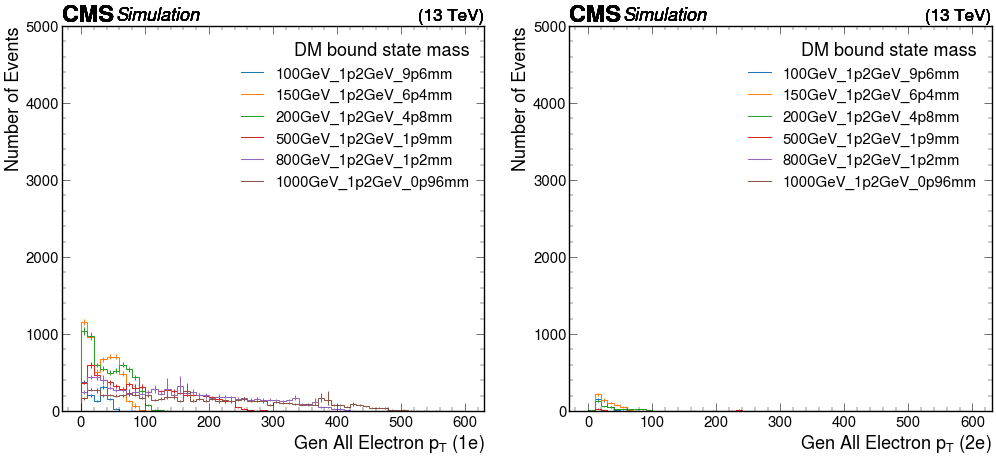

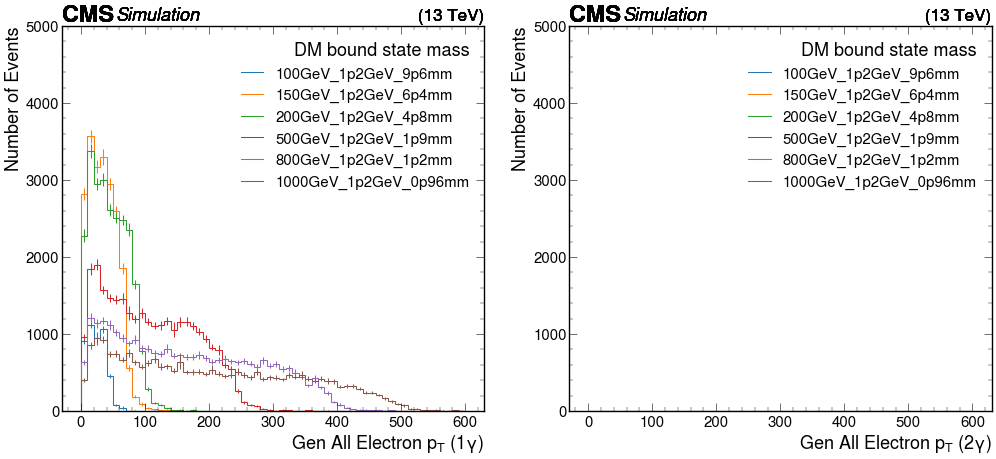

In [3]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_pt_highRange"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen All Electron $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_pt_highRange"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen All Electron $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_pt_highRange"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen All Electron $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_pt_highRange"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen All Electron $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE_pt_highRange"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen All Electron $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


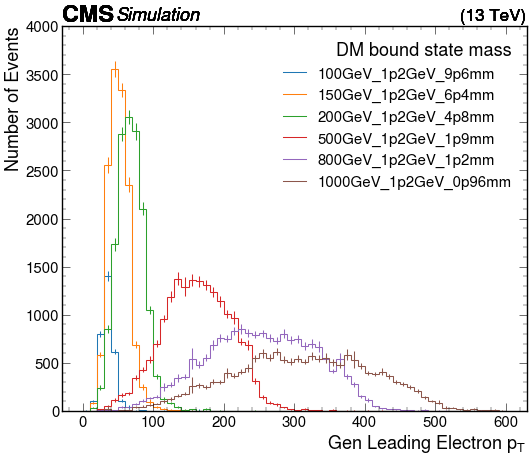

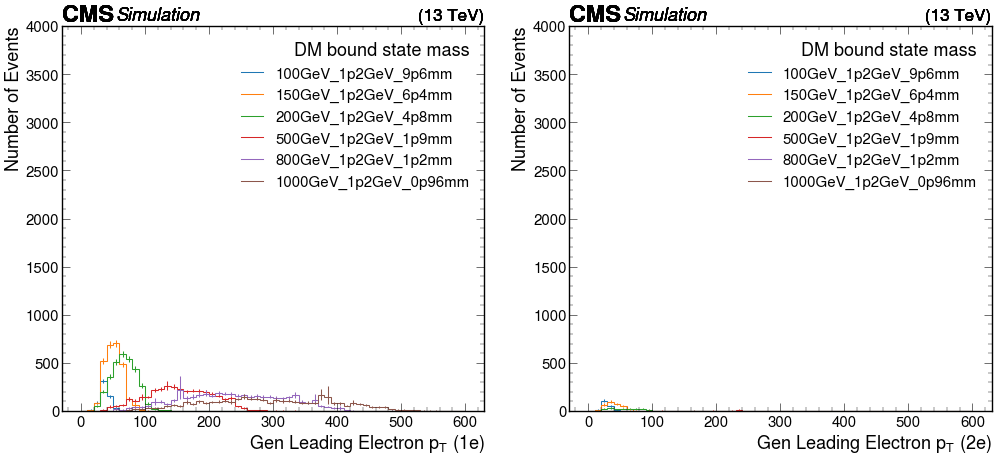

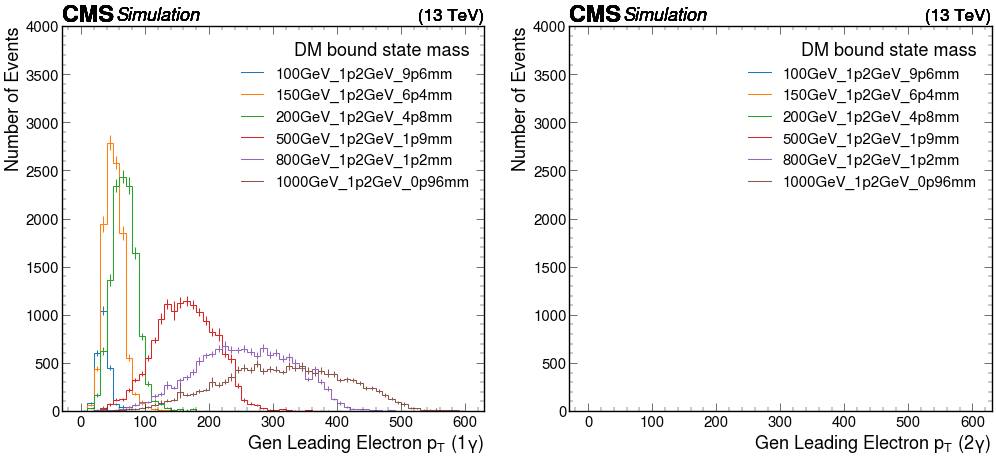

In [6]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt_highRange"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Leading Electron $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt_highRange"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Leading Electron $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt_highRange"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Leading Electron $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt_highRange"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Leading Electron $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE0_pt_highRange"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Leading Electron $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


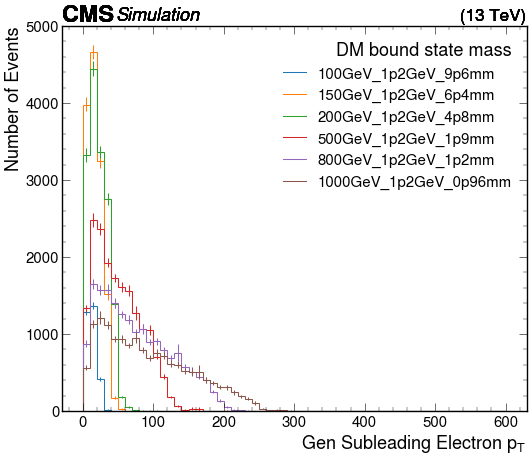

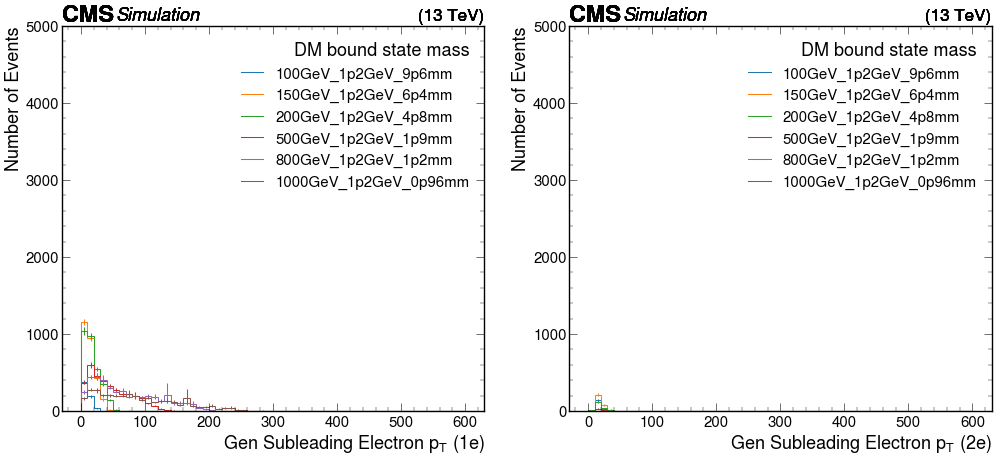

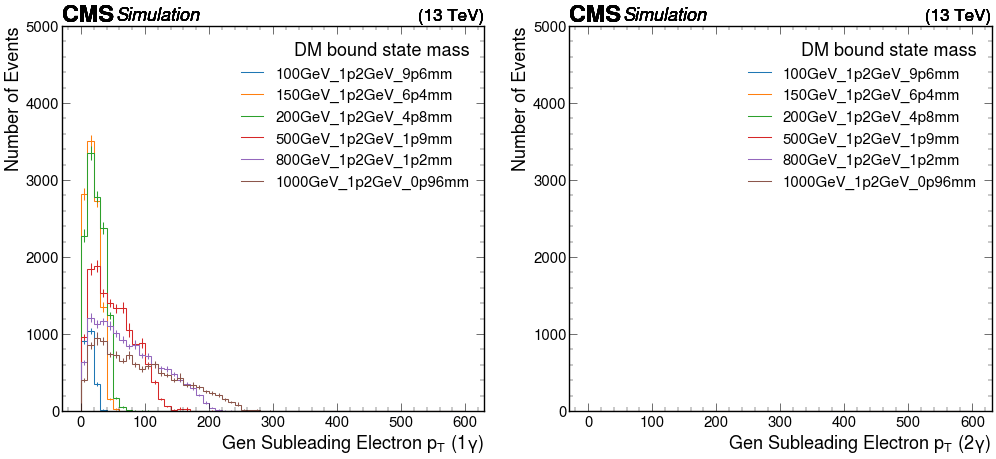

In [8]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt_highRange"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Subleading Electron $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt_highRange"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Subleading Electron $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt_highRange"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Subleading Electron $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt_highRange"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Subleading Electron $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genE1_pt_highRange"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Gen Subleading Electron $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

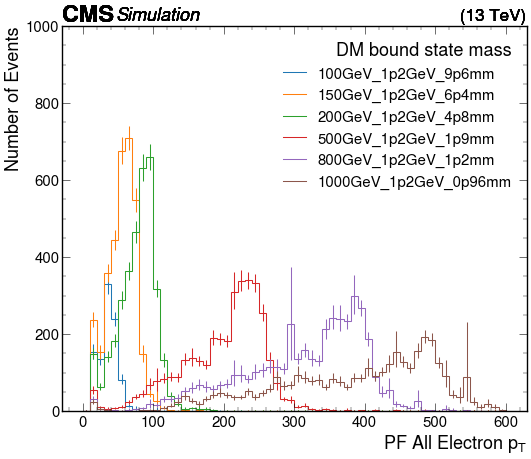

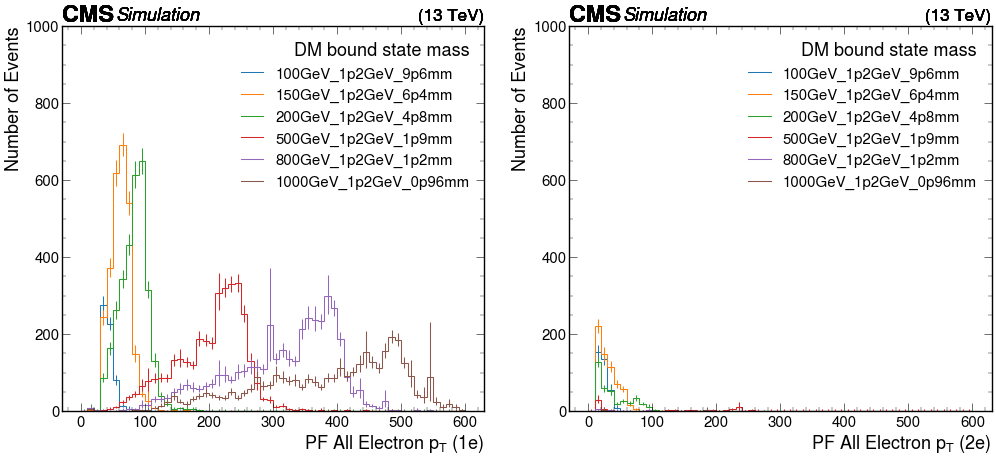

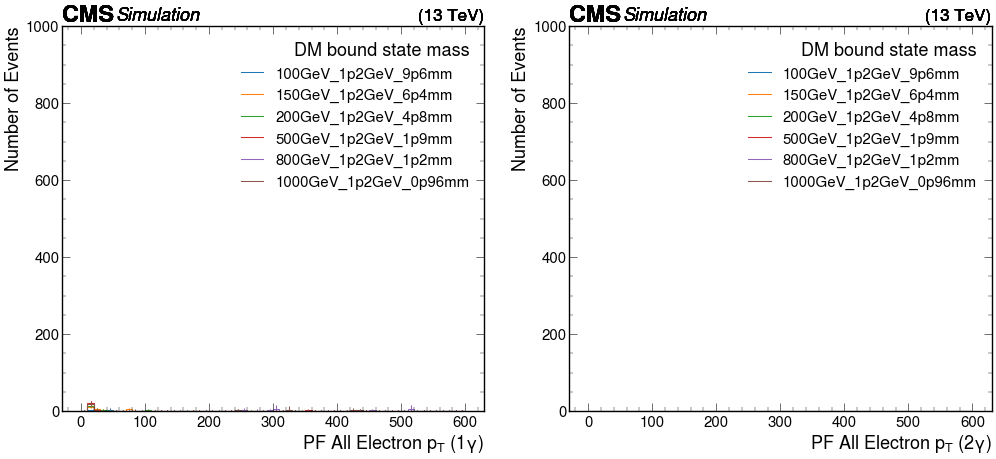

In [20]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF All Electron $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF All Electron $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF All Electron $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF All Electron $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF All Electron $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

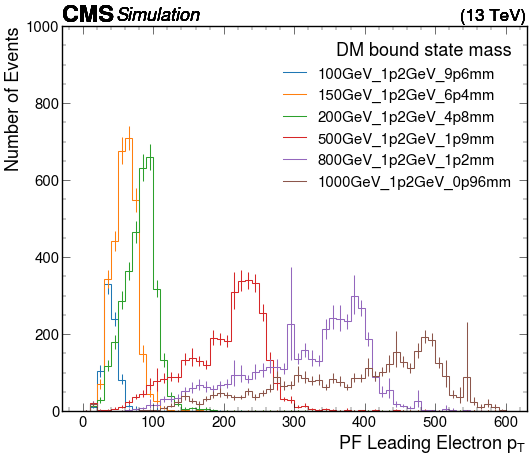

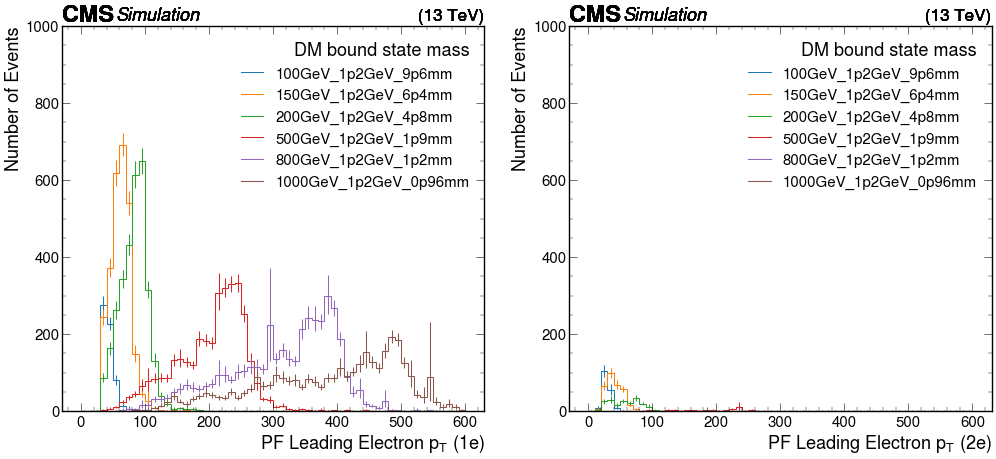

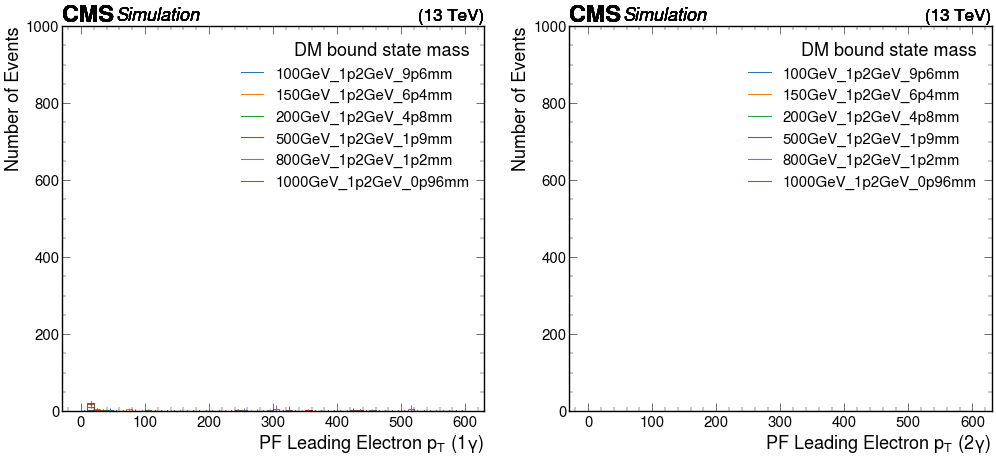

In [10]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron0_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Electron $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron0_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Electron $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron0_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Electron $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron0_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Electron $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron0_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Electron $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,1000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

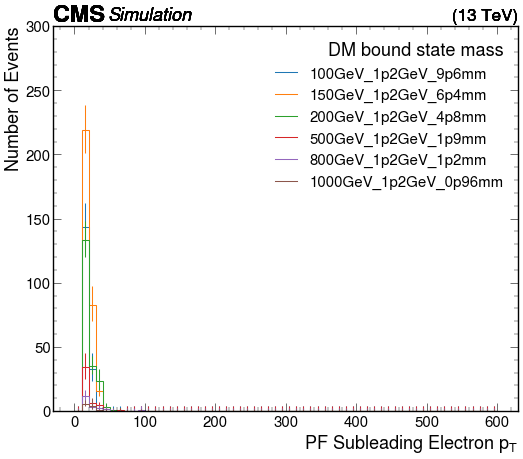

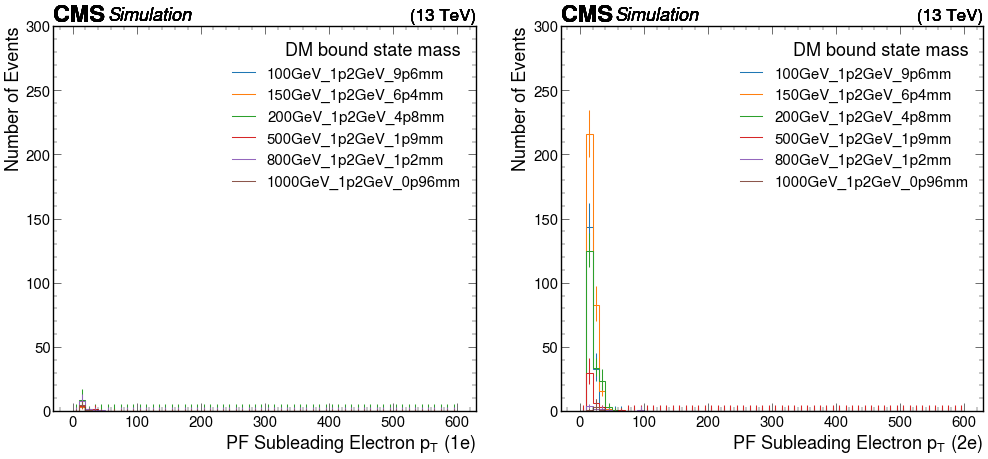

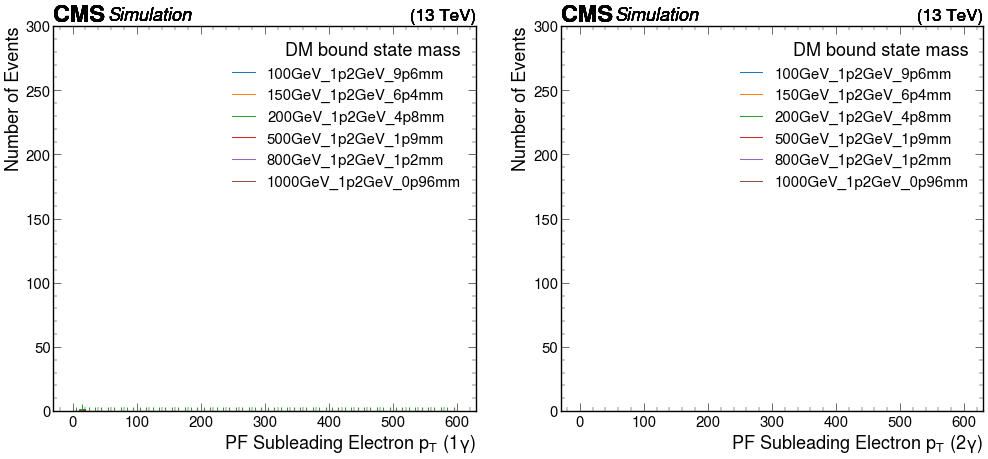

In [20]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron1_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Electron $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,300)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron1_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Electron $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,300)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron1_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Electron $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,300)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron1_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Electron $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,300)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron1_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Electron $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,300)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

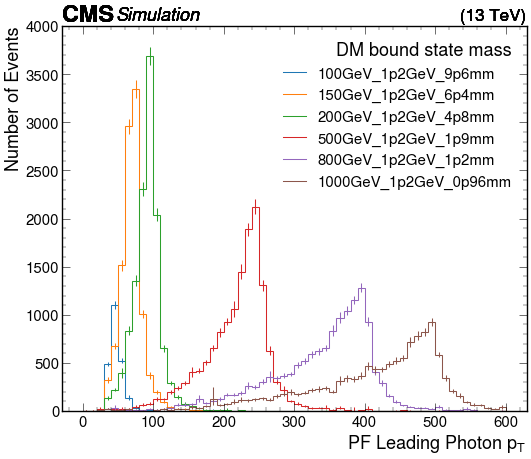

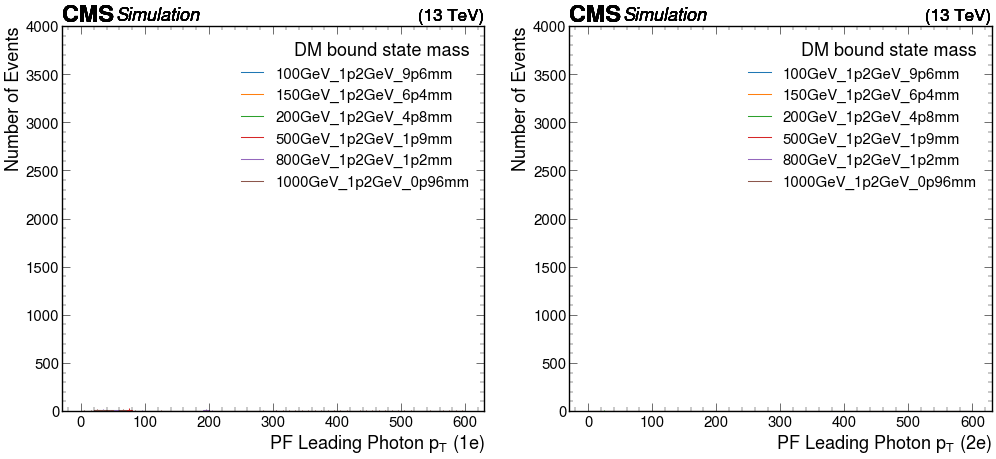

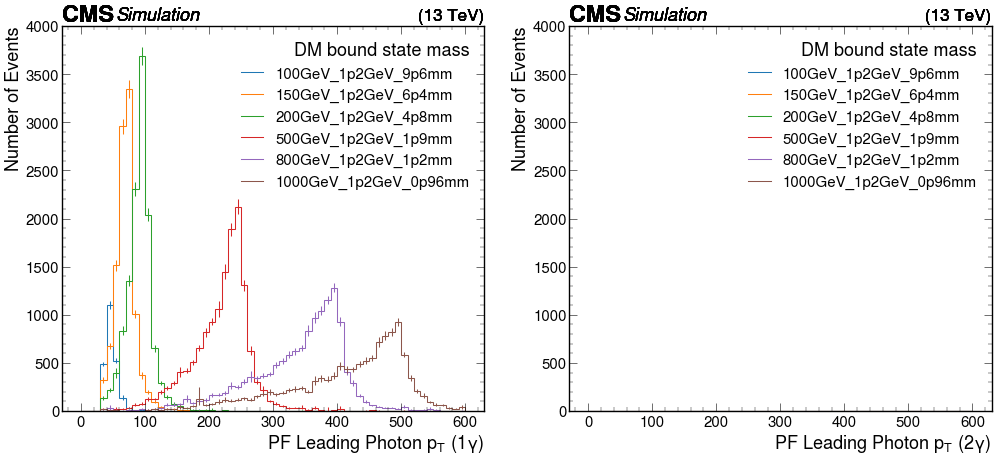

In [18]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon0_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Photon $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon0_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Photon $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon0_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Photon $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon0_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Photon $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon0_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Leading Photon $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,4000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

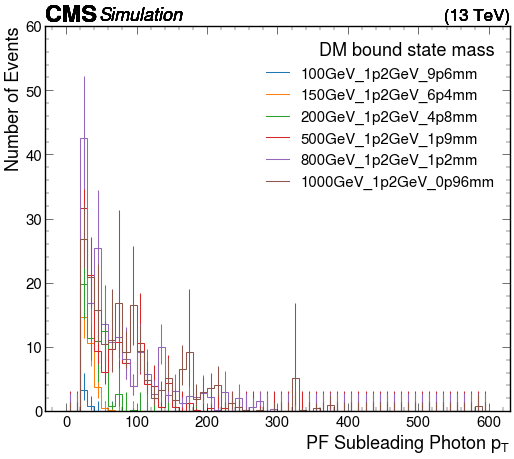

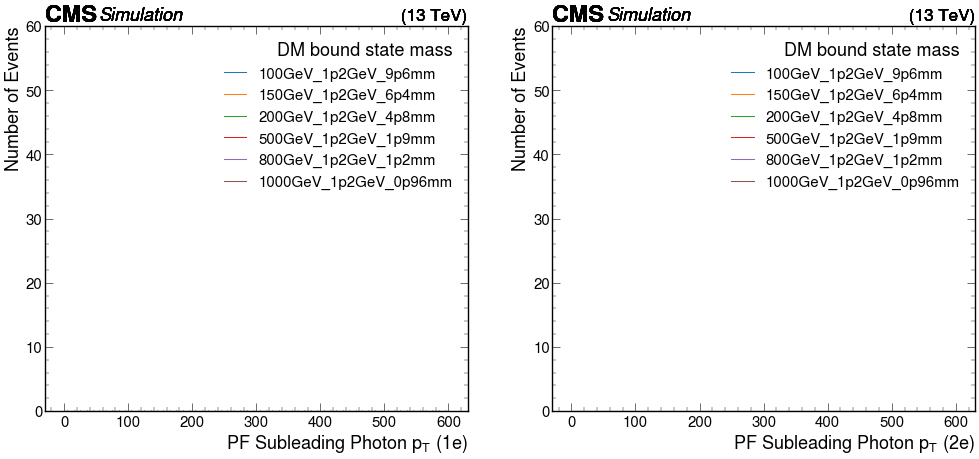

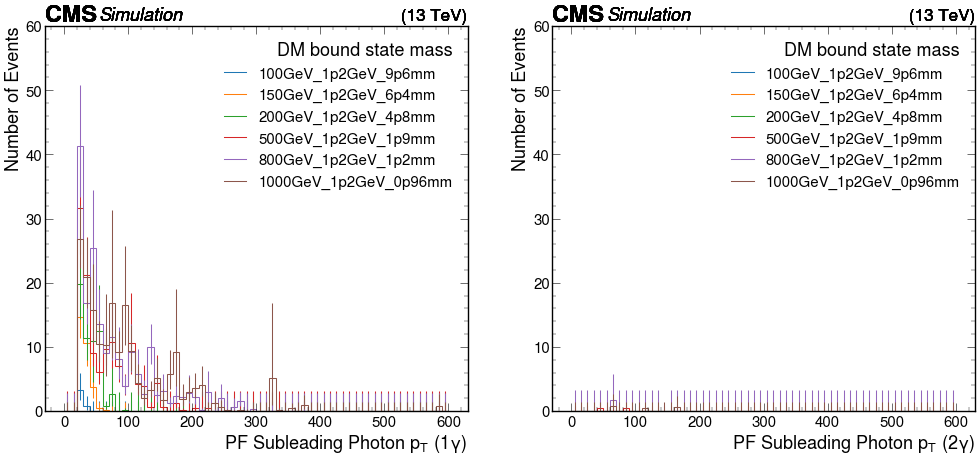

In [6]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon1_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Photon $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,60)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon1_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Photon $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,60)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon1_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Photon $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,60)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon1_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Photon $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,60)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon1_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("PF Subleading Photon $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,60)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


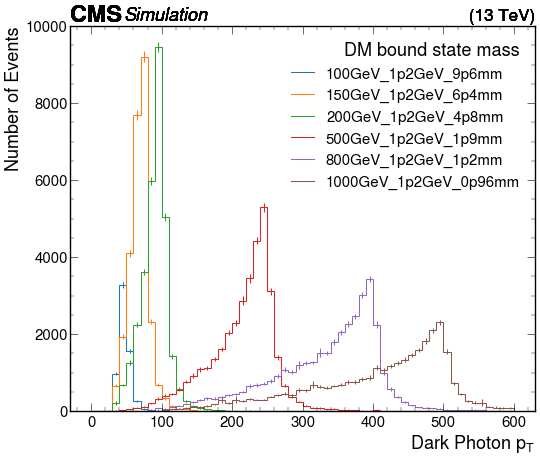

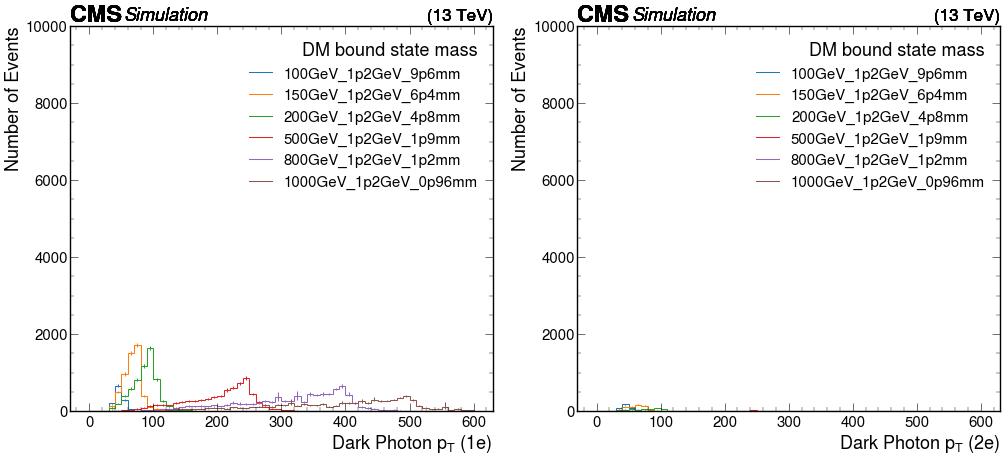

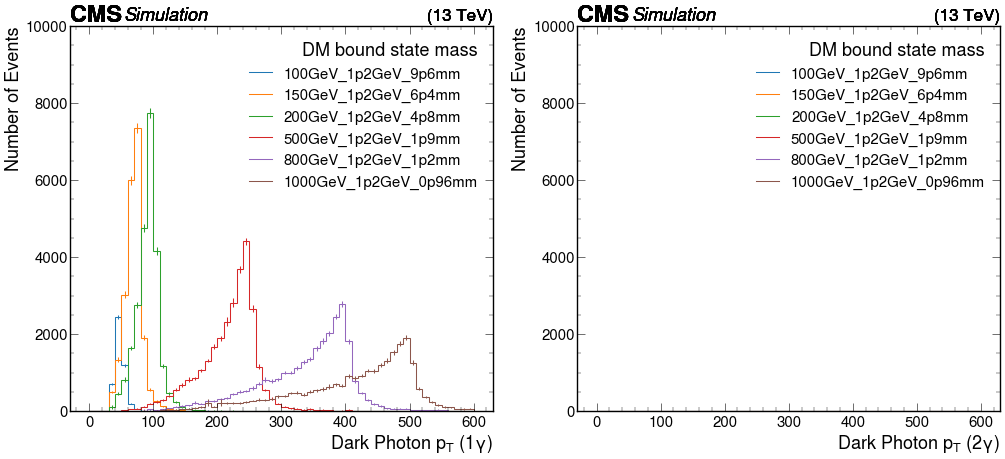

In [15]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Dark Photon $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,10000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Dark Photon $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,10000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Dark Photon $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,10000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Dark Photon $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,10000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("Dark Photon $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,10000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


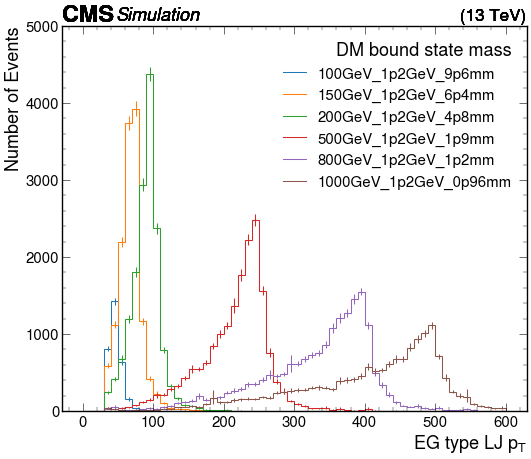

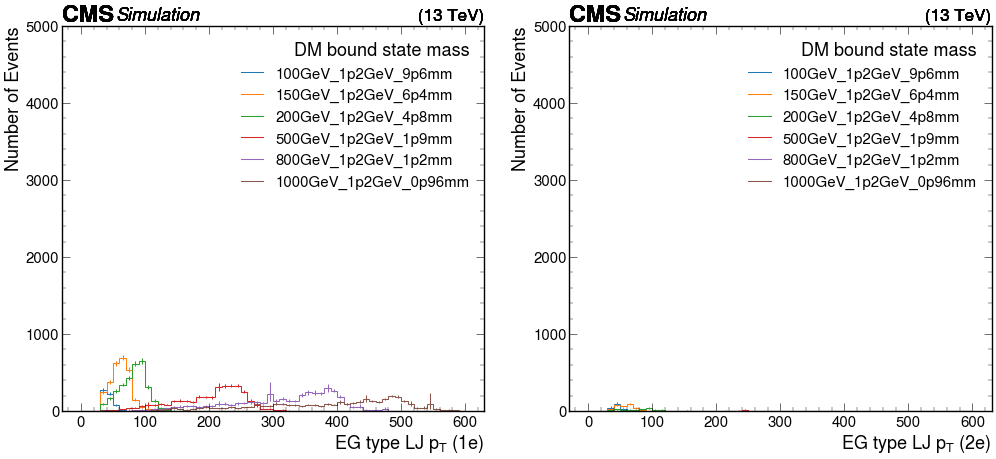

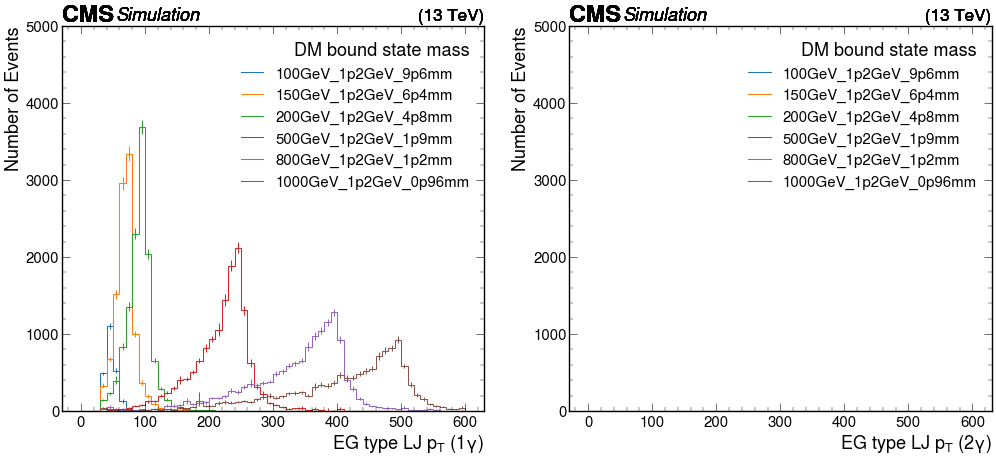

In [19]:
sample_name = [s.split("_")[1]+"_"+s.split("_")[2]+"_"+s.split("_")[3] for s in samples]
masses = [s.split("_")[1] for s in samples]
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("EG type LJ $p_{T}$")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[1], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("EG type LJ $p_{T}$ (1e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[2], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("EG type LJ $p_{T}$ (2e)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10))
    
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[3], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("EG type LJ $p_{T}$ (1$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)
    
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[4], :600j], density=False, flow='none')
    plt.legend(sample_name, title="DM bound state mass", alignment="right")
    plt.xlabel("EG type LJ $p_{T}$ (2$\gamma$)")
    plt.ylabel("Number of Events")
    plt.ylim(0,5000)

In [4]:
out[sample]['counters']['0']['2mu2e']

{'Total LJs': 57953,
 'Gen As to muons': 28872,
 'Gen As to electrons': 28872,
 'Matched gen As to muons': 28856,
 'Matched gen As to electrons': 28766,
 'Number of EGM type LJ': 29073,
 'Number of 1electron LJ': 6405,
 'Number of 2electron LJ': 10,
 'Number of 1photon LJ': 22653,
 'Number of 2photon LJ': 3}

In [5]:
out[sample]['counters']['0']["2mu2e_oneelectron"]

{'Total LJs': 12865,
 'Gen As to muons': 6404,
 'Gen As to electrons': 6404,
 'Matched gen As to muons': 6402,
 'Matched gen As to electrons': 6400,
 'Number of EGM type LJ': 6457,
 'Number of 1electron LJ': 6405,
 'Number of 2electron LJ': 0,
 'Number of 1photon LJ': 52,
 'Number of 2photon LJ': 0}

In [6]:
out[sample]['counters']['0']["2mu2e_onephoton"]

{'Total LJs': 45214,
 'Gen As to muons': 22505,
 'Gen As to electrons': 22505,
 'Matched gen As to muons': 22491,
 'Matched gen As to electrons': 22403,
 'Number of EGM type LJ': 22705,
 'Number of 1electron LJ': 52,
 'Number of 2electron LJ': 0,
 'Number of 1photon LJ': 22653,
 'Number of 2photon LJ': 0}

In [7]:
out[sample]['counters']['0']["2mu2e_twoelectron"]

{'Total LJs': 20,
 'Gen As to muons': 10,
 'Gen As to electrons': 10,
 'Matched gen As to muons': 10,
 'Matched gen As to electrons': 10,
 'Number of EGM type LJ': 10,
 'Number of 1electron LJ': 0,
 'Number of 2electron LJ': 10,
 'Number of 1photon LJ': 0,
 'Number of 2photon LJ': 0}

In [8]:
out[sample]['counters']['0']["2mu2e_twophoton"]

{'Total LJs': 6,
 'Gen As to muons': 3,
 'Gen As to electrons': 3,
 'Matched gen As to muons': 3,
 'Matched gen As to electrons': 3,
 'Number of EGM type LJ': 3,
 'Number of 1electron LJ': 0,
 'Number of 2electron LJ': 0,
 'Number of 1photon LJ': 0,
 'Number of 2photon LJ': 3}